<a href="https://colab.research.google.com/github/Gruzver/AR_tester/blob/main/Ex_final_Temas_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXAMEN FINAL**

**1. . Preprocesamiento de datos**

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.fft import fft, ifft
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [234]:
# Conectando google drive con google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
ruta='/content/drive/MyDrive/ColabNotebooks/Temas H/Ex_final/data_examen2/T1/50000/signal_1.csv'

In [236]:
import os
import pandas as pd

# Define la ruta base
base_path = '/content/drive/MyDrive/ColabNotebooks/Temas H/Ex_final/data_examen2'

# Lista para almacenar los DataFrames
dfs = []

# Recorre todas las carpetas principales dentro de data_examen2 (T1, T2, T3, T4, T5)
for carpeta_principal in os.listdir(base_path):
    carpeta_principal_path = os.path.join(base_path, carpeta_principal)
    if os.path.isdir(carpeta_principal_path):
        # Recorre todas las subcarpetas dentro de cada carpeta principal
        for subcarpeta in os.listdir(carpeta_principal_path):
            subcarpeta_path = os.path.join(carpeta_principal_path, subcarpeta)
            if os.path.isdir(subcarpeta_path):
                # Define las rutas de los archivos dentro de cada subcarpeta
                ruta_1 = os.path.join(subcarpeta_path, 'signal_1.csv')
                ruta_2 = os.path.join(subcarpeta_path, 'signal_2.csv')

                # Verifica si ambos archivos existen
                if os.path.exists(ruta_1) and os.path.exists(ruta_2):
                    # Lee los archivos CSV
                    df1 = pd.read_csv(ruta_1)
                    df2 = pd.read_csv(ruta_2)

                    # Une los DataFrames en horizontal
                    df_unido = pd.concat([df1, df2], axis=1)

                    # Agrega una columna con el nombre de la subcarpeta y otra con el nombre de la carpeta principal
                    df_unido['Subcarpeta'] = subcarpeta
                    df_unido['Carpeta_principal'] = carpeta_principal

                    # Agrega el DataFrame unido a la lista
                    dfs.append(df_unido)

# Une todos los DataFrames en vertical
df_final = pd.concat(dfs, axis=0)

# Muestra los primeros 5 registros del DataFrame final
print(df_final.head())

# Si deseas guardar el DataFrame final en un archivo CSV
df_final.to_csv('/content/drive/MyDrive/ColabNotebooks/Temas H/Ex_final/data_examen2/df_final.csv', index=False)
df_final

           time   ch1     ch2          time   ch1     ch2 Subcarpeta  \
0  0.000000e+00 -0.04  0.0040  0.000000e+00 -0.04 -0.0024      42000   
1  5.000000e-08  0.00  0.0000  5.000000e-08 -0.04  0.0132      42000   
2  1.000000e-07 -0.04  0.0052  1.000000e-07 -0.04  0.0112      42000   
3  1.500000e-07  0.00  0.0008  1.500000e-07 -0.04  0.0004      42000   
4  2.000000e-07 -0.04  0.0028  2.000000e-07  0.00 -0.0072      42000   

  Carpeta_principal  
0                T5  
1                T5  
2                T5  
3                T5  
4                T5  


,time,ch1,ch2,time,ch1,ch2,Subcarpeta,Carpeta_principal
0,0.000000e+00,-0.04,0.0040,0.000000e+00,-0.04,-0.0024,42000,T5
1,5.000000e-08,0.00,0.0000,5.000000e-08,-0.04,0.0132,42000,T5
2,1.000000e-07,-0.04,0.0052,1.000000e-07,-0.04,0.0112,42000,T5
3,1.500000e-07,0.00,0.0008,1.500000e-07,-0.04,0.0004,42000,T5
4,2.000000e-07,-0.04,0.0028,2.000000e-07,0.00,-0.0072,42000,T5
...,...,...,...,...,...,...,...,...
3995,1.997500e-04,0.00,-0.0272,1.997500e-04,0.00,-0.0248,72000,T2
3996,1.998000e-04,0.00,-0.0184,1.998000e-04,0.00,-0.0240,72000,T2
3997,1.998500e-04,0.00,-0.0208,1.998500e-04,0.00,-0.0224,72000,T2
3998,1.999000e-04,0.00,-0.0160,1.999000e-04,0.00,-0.0176,72000,T2


In [237]:
df_final.columns = [
    'time_signal_1', 'ch1_signal_1', 'ch2_signal1',
    'time_signal_2', 'ch1_signal2', 'ch2_signal2',
    'number_cycle', 'Tnumber'
]

In [238]:
df_final_ordenado = df_final.sort_values(by=['Tnumber', 'number_cycle'])
df_final_ordenado

,time_signal_1,ch1_signal_1,ch2_signal1,time_signal_2,ch1_signal2,ch2_signal2,number_cycle,Tnumber
0,0.000000e+00,0.00,-0.056001,0.000000e+00,0.00,0.004001,50000,T1
1,5.000000e-08,0.00,-0.060001,5.000000e-08,0.00,0.004001,50000,T1
2,1.000000e-07,0.00,-0.056001,1.000000e-07,0.00,-0.012001,50000,T1
3,1.500000e-07,0.00,-0.064001,1.500000e-07,0.00,-0.012001,50000,T1
4,2.000000e-07,0.00,-0.056001,2.000000e-07,0.00,-0.032001,50000,T1
...,...,...,...,...,...,...,...,...
3995,1.997500e-04,-0.04,0.020000,1.997500e-04,-0.04,0.009600,56000,T5
3996,1.998000e-04,0.00,0.019200,1.998000e-04,-0.04,0.008800,56000,T5
3997,1.998500e-04,-0.04,0.016000,1.998500e-04,0.00,0.010400,56000,T5
3998,1.999000e-04,0.00,0.013600,1.999000e-04,-0.04,0.010400,56000,T5


In [239]:
# dado que time_signal_1 y 2 corresponden al mismo valor para cada caso procedemos a borrar el segundo
df_final_ordenado = df_final_ordenado.drop(columns=['time_signal_2'])
df_final_ordenado

,time_signal_1,ch1_signal_1,ch2_signal1,ch1_signal2,ch2_signal2,number_cycle,Tnumber
0,0.000000e+00,0.00,-0.056001,0.00,0.004001,50000,T1
1,5.000000e-08,0.00,-0.060001,0.00,0.004001,50000,T1
2,1.000000e-07,0.00,-0.056001,0.00,-0.012001,50000,T1
3,1.500000e-07,0.00,-0.064001,0.00,-0.012001,50000,T1
4,2.000000e-07,0.00,-0.056001,0.00,-0.032001,50000,T1
...,...,...,...,...,...,...,...
3995,1.997500e-04,-0.04,0.020000,-0.04,0.009600,56000,T5
3996,1.998000e-04,0.00,0.019200,-0.04,0.008800,56000,T5
3997,1.998500e-04,-0.04,0.016000,0.00,0.010400,56000,T5
3998,1.999000e-04,0.00,0.013600,-0.04,0.010400,56000,T5


In [240]:
missing_values = df_final_ordenado.isnull().sum()
missing_percentage = (df_final_ordenado.isnull().sum() / len(df_final_ordenado)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_data)

               Missing Values  Percentage
time_signal_1             798    0.623438
ch1_signal_1                0    0.000000
ch2_signal1                 0    0.000000
ch1_signal2                 0    0.000000
ch2_signal2                 0    0.000000
number_cycle                0    0.000000
Tnumber                     0    0.000000


In [241]:
#Verificamos que los parametros principales, es decir, los sensores, no presentan valores nulos


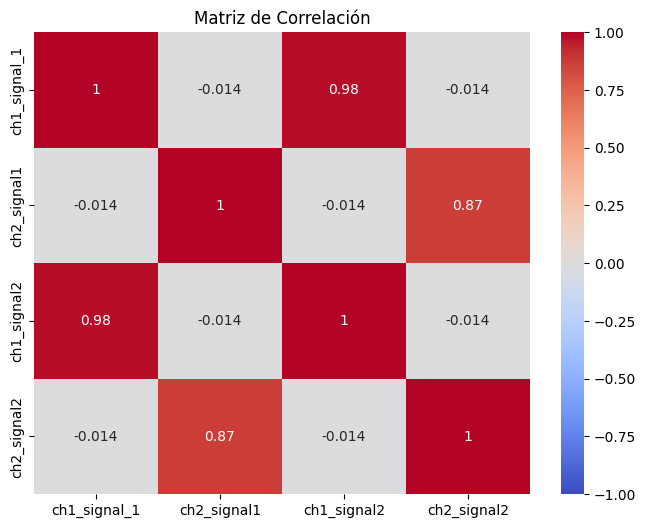

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes el DataFrame df_final_ordenado

# Selecciona solo las columnas específicas
columnas_interes = ['ch1_signal_1', 'ch2_signal1', 'ch1_signal2', 'ch2_signal2']
df_interes = df_final_ordenado[columnas_interes]

# Calcula la matriz de correlación
correlation_matrix = df_interes.corr()

# Grafica la matriz de correlación usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [243]:
# Observamos que los parametros de ch1_signal2 y ch1_signal1 tienen una alta correlación por lo que se considera adecuado
#eliminar una de las columnas, ambas en sí no aportan.
df_final_ordenado = df_final_ordenado.drop(columns=['ch1_signal2'])
df_final_ordenado

,time_signal_1,ch1_signal_1,ch2_signal1,ch2_signal2,number_cycle,Tnumber
0,0.000000e+00,0.00,-0.056001,0.004001,50000,T1
1,5.000000e-08,0.00,-0.060001,0.004001,50000,T1
2,1.000000e-07,0.00,-0.056001,-0.012001,50000,T1
3,1.500000e-07,0.00,-0.064001,-0.012001,50000,T1
4,2.000000e-07,0.00,-0.056001,-0.032001,50000,T1
...,...,...,...,...,...,...
3995,1.997500e-04,-0.04,0.020000,0.009600,56000,T5
3996,1.998000e-04,0.00,0.019200,0.008800,56000,T5
3997,1.998500e-04,-0.04,0.016000,0.010400,56000,T5
3998,1.999000e-04,0.00,0.013600,0.010400,56000,T5


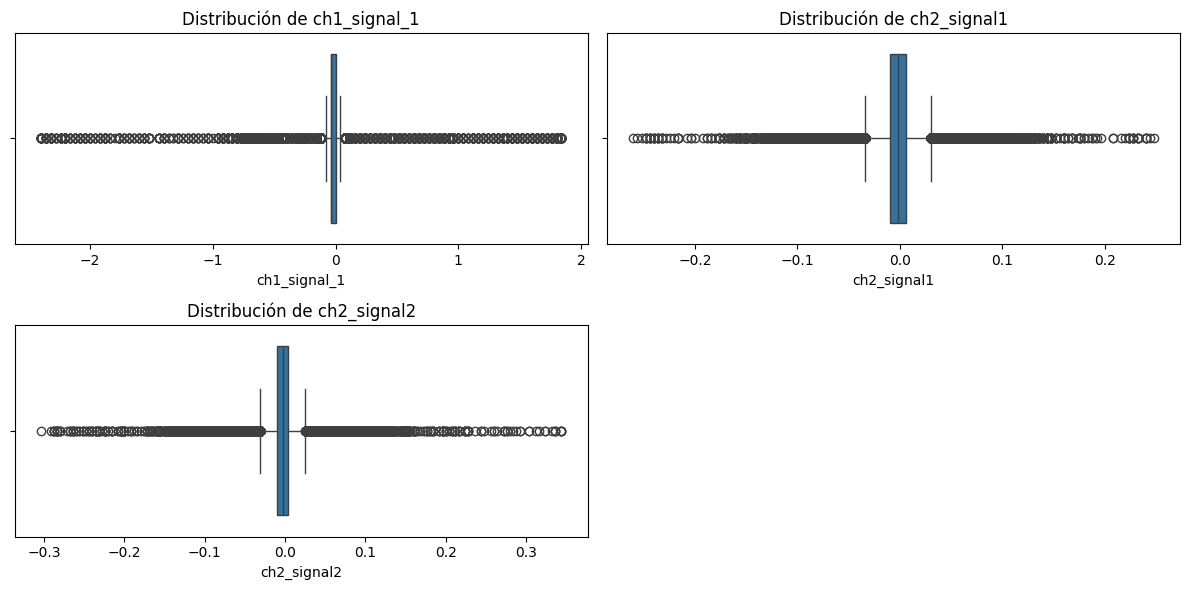

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes el DataFrame df_final_ordenado

# Selecciona solo las columnas específicas
columnas_interes = ['ch1_signal_1', 'ch2_signal1', 'ch2_signal2']
df_interes = df_final_ordenado[columnas_interes]

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Itera sobre las columnas y grafica cada una
for i, col in enumerate(df_interes.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_interes[col])
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


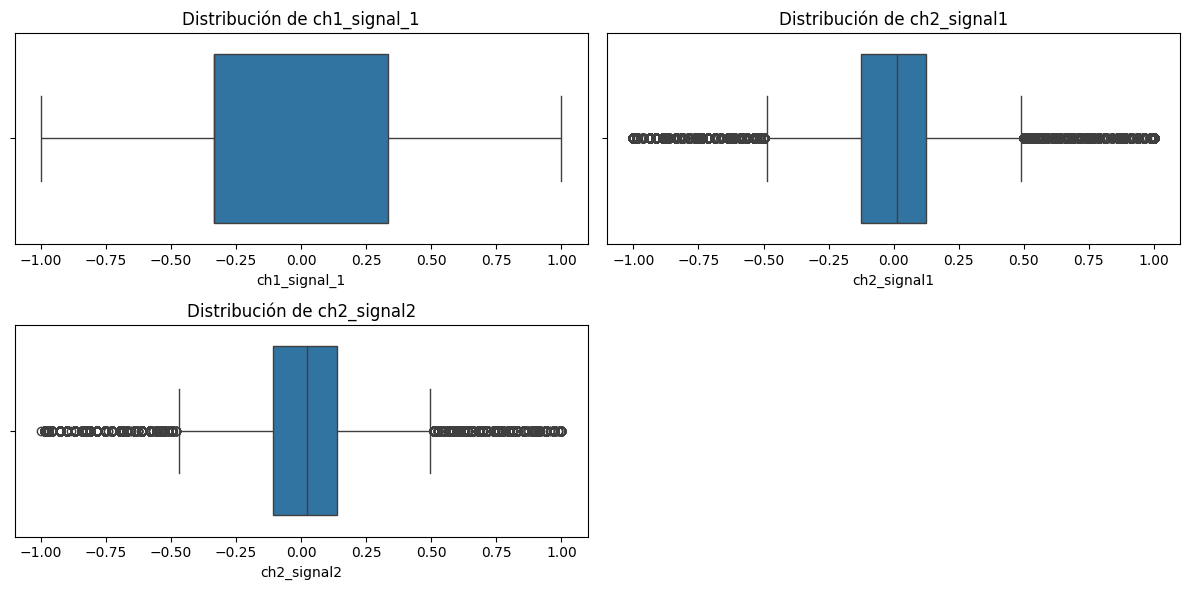

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asumiendo que ya tienes el DataFrame df_final_ordenado y df_interes definidos como antes

# Convierte las columnas de interés a tipo numérico si es necesario
df_interes = df_interes.apply(pd.to_numeric, errors='coerce')

# Calcula el rango intercuartílico (IQR) para cada columna de interés
Q1 = df_interes.quantile(0.25)
Q3 = df_interes.quantile(0.75)
IQR = Q3 - Q1

# Define los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica y trata los outliers en df_final_ordenado
for col in df_interes.columns:
    df_final_ordenado[col] = np.where(
        (df_final_ordenado[col] < lower_bound[col]) | (df_final_ordenado[col] > upper_bound[col]),
        df_interes[col].median(),  # Puedes cambiar esto por la media o cualquier otro valor
        df_final_ordenado[col]
    )

# Normalización de valores entre -1 y 1 solo para las columnas de interés
for col in ['ch1_signal_1', 'ch2_signal1', 'ch2_signal2']:
    df_final_ordenado[col] = (df_final_ordenado[col] - df_final_ordenado[col].min()) / (df_final_ordenado[col].max() - df_final_ordenado[col].min()) * 2 - 1

# Graficar las distribuciones actualizadas
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_interes.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_final_ordenado[col])
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


**2.  Modeling**

In [246]:
#Ahora procedemos a realizar las agregaciones para los 3 parametros principales
aggs={}

aggs['ch1_signal_1'] = ['mean',  'std']
aggs['ch2_signal1'] = ['mean',  'std']
aggs['ch2_signal2'] = ['mean',  'std']

data_agg = df_final_ordenado.groupby(['Tnumber', 'number_cycle']).agg(aggs)
data_agg.columns=data_agg.columns.map('_'.join)
data_agg=data_agg.reset_index()
data_agg

,Tnumber,number_cycle,ch1_signal_1_mean,ch1_signal_1_std,ch2_signal1_mean,ch2_signal1_std,ch2_signal2_mean,ch2_signal2_std
0,T1,50000,0.324662,0.244825,-0.049685,0.407078,0.005457,0.437274
1,T1,60000,0.313328,0.226200,-0.002000,0.301568,0.031924,0.295112
2,T1,62500,0.318328,0.235250,-0.010884,0.296165,0.054295,0.293565
3,T1,65500,0.311328,0.226015,0.031409,0.312343,0.039004,0.302450
4,T1,69025,0.313161,0.229357,0.031328,0.327894,0.000755,0.314983
5,T1,70026,0.318661,0.236684,-0.010562,0.344694,0.025327,0.329027
6,T1,70766,0.325661,0.248012,0.051816,0.342328,0.070137,0.323794
7,T2,50000,0.321661,0.193462,0.038716,0.351819,0.042011,0.345229
8,T2,70033,0.324828,0.199563,0.060453,0.357134,0.072629,0.343300
9,T2,72000,0.322995,0.192963,0.017475,0.317297,-0.013151,0.340354


In [247]:
#ahora procedemos a agregar el valor y, es decir los resultados para cada sensado
ruta_resultados='/content/drive/MyDrive/ColabNotebooks/Temas H/Ex_final/data_examen2/crack_length.csv'
df_resultados = pd.read_csv(ruta_resultados)
df_resultados.rename(columns={'Number of cycle': 'number_cycle'}, inplace=True)
df_resultados

,Tnumber,number_cycle,Crack length (mm)
0,T2,50000,0.00
1,T2,70033,3.25
2,T2,72000,4.95
3,T3,14000,0.00
4,T3,50000,0.00
5,T3,57038,2.57
6,T3,60035,4.02
7,T3,62017,4.72
8,T3,64019,5.49
9,T3,65029,5.90


In [248]:
#primero separamos las filas en train y test
# Filtra los datos para data_train (T2, T3, T4, T5)
data_train = data_agg[data_agg['Tnumber'].isin(['T2', 'T3', 'T4', 'T5'])]

# Filtra los datos para data_test (T1)
data_test = data_agg[data_agg['Tnumber'] == 'T1']

In [249]:
data_train

,Tnumber,number_cycle,ch1_signal_1_mean,ch1_signal_1_std,ch2_signal1_mean,ch2_signal1_std,ch2_signal2_mean,ch2_signal2_std
7,T2,50000,0.321661,0.193462,0.038716,0.351819,0.042011,0.345229
8,T2,70033,0.324828,0.199563,0.060453,0.357134,0.072629,0.343300
9,T2,72000,0.322995,0.192963,0.017475,0.317297,-0.013151,0.340354
10,T3,14000,-0.202330,0.343152,0.027719,0.328891,0.050986,0.327495
11,T3,50000,-0.147331,0.350060,-0.102525,0.343864,0.075043,0.345017
12,T3,55391,-0.143331,0.345661,-0.069037,0.346000,0.063086,0.341891
13,T3,57038,-0.157997,0.345697,-0.049169,0.348707,-0.027763,0.346371
14,T3,60035,-0.089499,0.351528,-0.010075,0.351036,0.065640,0.341154
15,T3,62017,-0.149498,0.342714,0.022544,0.350899,0.039568,0.348730
16,T3,64019,-0.178664,0.342042,0.035606,0.354646,0.032374,0.363217


In [250]:
data_train.dtypes

Tnumber               object
number_cycle          object
ch1_signal_1_mean    float64
ch1_signal_1_std     float64
ch2_signal1_mean     float64
ch2_signal1_std      float64
ch2_signal2_mean     float64
ch2_signal2_std      float64
dtype: object

In [251]:
df_resultados.dtypes

Tnumber               object
number_cycle           int64
Crack length (mm)    float64
dtype: object

In [252]:
df_resultados['number_cycle'] = df_resultados['number_cycle'].astype(str)
df_resultados.dtypes

Tnumber               object
number_cycle          object
Crack length (mm)    float64
dtype: object

In [253]:
data_train_con_crack_length = pd.merge(data_train, df_resultados[['Tnumber', 'number_cycle', 'Crack length (mm)']],
                                      on=['Tnumber', 'number_cycle'], how='left')

In [254]:
data_train_con_crack_length

,Tnumber,number_cycle,ch1_signal_1_mean,ch1_signal_1_std,ch2_signal1_mean,ch2_signal1_std,ch2_signal2_mean,ch2_signal2_std,Crack length (mm)
0,T2,50000,0.321661,0.193462,0.038716,0.351819,0.042011,0.345229,0.00
1,T2,70033,0.324828,0.199563,0.060453,0.357134,0.072629,0.343300,3.25
2,T2,72000,0.322995,0.192963,0.017475,0.317297,-0.013151,0.340354,4.95
3,T3,14000,-0.202330,0.343152,0.027719,0.328891,0.050986,0.327495,0.00
4,T3,50000,-0.147331,0.350060,-0.102525,0.343864,0.075043,0.345017,0.00
5,T3,55391,-0.143331,0.345661,-0.069037,0.346000,0.063086,0.341891,NaN
6,T3,57038,-0.157997,0.345697,-0.049169,0.348707,-0.027763,0.346371,2.57
7,T3,60035,-0.089499,0.351528,-0.010075,0.351036,0.065640,0.341154,4.02
8,T3,62017,-0.149498,0.342714,0.022544,0.350899,0.039568,0.348730,4.72
9,T3,64019,-0.178664,0.342042,0.035606,0.354646,0.032374,0.363217,5.49


In [255]:
data_train_con_crack_length = data_train_con_crack_length.dropna(subset=['Crack length (mm)'])

In [256]:
data_train_con_crack_length

,Tnumber,number_cycle,ch1_signal_1_mean,ch1_signal_1_std,ch2_signal1_mean,ch2_signal1_std,ch2_signal2_mean,ch2_signal2_std,Crack length (mm)
0,T2,50000,0.321661,0.193462,0.038716,0.351819,0.042011,0.345229,0.00
1,T2,70033,0.324828,0.199563,0.060453,0.357134,0.072629,0.343300,3.25
2,T2,72000,0.322995,0.192963,0.017475,0.317297,-0.013151,0.340354,4.95
3,T3,14000,-0.202330,0.343152,0.027719,0.328891,0.050986,0.327495,0.00
4,T3,50000,-0.147331,0.350060,-0.102525,0.343864,0.075043,0.345017,0.00
6,T3,57038,-0.157997,0.345697,-0.049169,0.348707,-0.027763,0.346371,2.57
7,T3,60035,-0.089499,0.351528,-0.010075,0.351036,0.065640,0.341154,4.02
8,T3,62017,-0.149498,0.342714,0.022544,0.350899,0.039568,0.348730,4.72
9,T3,64019,-0.178664,0.342042,0.035606,0.354646,0.032374,0.363217,5.49
10,T3,65029,-0.132498,0.349958,0.109300,0.336149,-0.066892,0.351879,5.90


In [257]:

# Dividir el DataFrame en dt_train (T2, T3, T4) y data_val (T5)
dt_train = data_train_con_crack_length[data_train_con_crack_length['Tnumber'].isin(['T2', 'T3', 'T4'])]
dt_val = data_train_con_crack_length[data_train_con_crack_length['Tnumber'] == 'T5']


In [258]:
dt_val

,Tnumber,number_cycle,ch1_signal_1_mean,ch1_signal_1_std,ch2_signal1_mean,ch2_signal1_std,ch2_signal2_mean,ch2_signal2_std,Crack length (mm)
21,T5,42000,-0.204997,0.337309,0.128797,0.249519,0.147004,0.287245,0.00
22,T5,46000,-0.215663,0.334931,-0.075719,0.290087,-0.033388,0.292322,0.00
23,T5,51000,-0.230663,0.331554,0.128256,0.192256,-0.118799,0.211669,2.70
24,T5,56000,-0.190663,0.348816,0.206500,0.193970,-0.004971,0.205120,3.64


In [259]:
# Definir X_train y y_train
X_train = dt_train[['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean',
                    'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]
y_train = dt_train['Crack length (mm)']

# Definir X_val
X_val = dt_val[['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean',
                'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]
y_val = dt_val['Crack length (mm)']

# Definir X_test
X_test = data_test[['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean',
                    'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]


In [260]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


MSE del modelo: 4.7241195466041255
MSE del baseline (media): 6.498392520775623


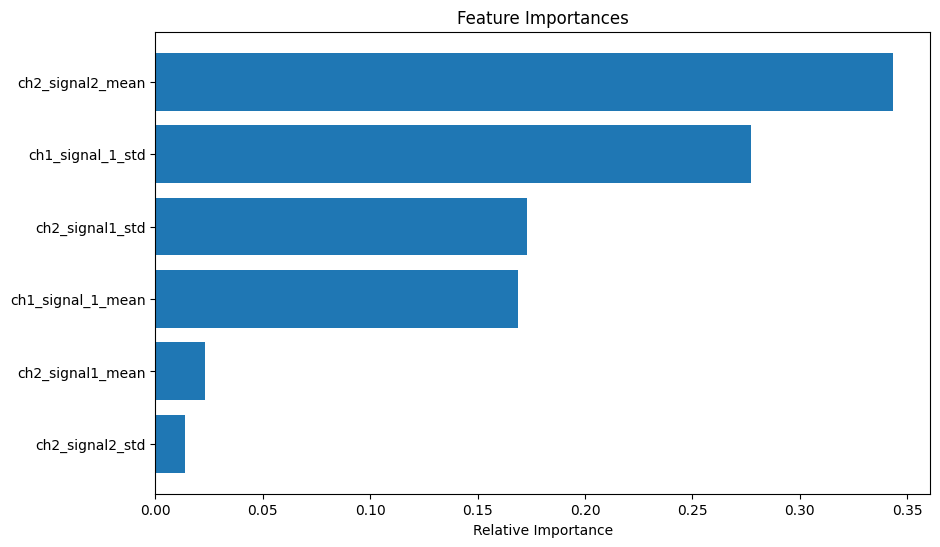

In [261]:

# Entrenar modelo XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicciones en conjunto de validación
y_pred = model.predict(X_val)

# Calcular MSE en conjunto de validación
mse_model = mean_squared_error(y_val, y_pred)

# Baseline: usar la media de y_train como valor constante
baseline_pred = np.mean(y_train)
mse_baseline = mean_squared_error(y_val, np.full_like(y_val, baseline_pred))

# Imprimir resultados de MSE
print(f"MSE del modelo: {mse_model}")
print(f"MSE del baseline (media): {mse_baseline}")

# Graficar Feature Importance Plot
feature_importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [262]:
# Al realizar el feature importance se obtuvo que las agreagaciones de mean y std son las unicas
# relevantes por lo que se quitaron sum min y max

**3.  Optimización de hiperparámetros**

In [263]:
#Ahora procedemos a realizar la optimización de hiperparametros
!pip install optuna


In [264]:
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [265]:

# Definir la función objetivo para Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    return mse

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
best_model = XGBRegressor(**best_params, random_state=42)

# Entrenar el mejor modelo con los mejores hiperparámetros
best_model.fit(X_train, y_train)

# Predicciones con el mejor modelo en conjunto de validación
y_pred_optimized = best_model.predict(X_val)

# Calcular MSE del mejor modelo en conjunto de validación
mse_optimized = mean_squared_error(y_val, y_pred_optimized)

# Comparar con el modelo base
model_base = XGBRegressor(random_state=42)
model_base.fit(X_train, y_train)
y_pred_base = model_base.predict(X_val)
mse_base = mean_squared_error(y_val, y_pred_base)

# Imprimir resultados de MSE y mejores hiperparámetros
print(f"MSE del modelo base: {mse_base}")
print(f"MSE del modelo optimizado: {mse_optimized}")
print(f"Mejores hiperparámetros encontrados: {best_params}")

[I 2024-07-06 15:35:13,617] A new study created in memory with name: no-name-939c9acc-e7c0-4a30-9b2e-64da3ad1f24a
<ipython-input-265-e193d29e4e7e>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
[I 2024-07-06 15:35:13,672] Trial 0 finished with value: 5.013527369546025 and parameters: {'n_estimators': 166, 'learning_rate': 0.049889497185262144, 'max_depth': 3}. Best is trial 0 with value: 5.013527369546025.
<ipython-input-265-e193d29e4e7e>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
[I 2024-07-06 15:35:13,737] Trial 1 finish

MSE del modelo base: 4.7241195466041255
MSE del modelo optimizado: 4.361629752836247
Mejores hiperparámetros encontrados: {'n_estimators': 183, 'learning_rate': 0.06346945509575637, 'max_depth': 5}


In [266]:
best_params

{'n_estimators': 183, 'learning_rate': 0.06346945509575637, 'max_depth': 5}

**4.  Cross Validation**

In [267]:
# Realizamos Crossvalidation par T2, T3, T4 y T5
import pandas as pd
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import optuna
from sklearn.model_selection import train_test_split

# Suponiendo que data_train_con_crack_length es tu DataFrame original con datos y best_params contiene los hiperparámetros optimizados

# Definir X e y
X = data_train_con_crack_length[['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean', 'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]
y = data_train_con_crack_length['Crack length (mm)']
Tnumber = data_train_con_crack_length['Tnumber'].values

# Lista para almacenar los resultados de MSE
mse_scores = []

# Iterar sobre cada valor único de Tnumber como conjunto de validación
for unique_Tnumber in sorted(set(Tnumber)):
    # Filtrar datos para conjunto de entrenamiento y validación
    X_train = X[Tnumber != unique_Tnumber]
    y_train = y[Tnumber != unique_Tnumber]
    X_val = X[Tnumber == unique_Tnumber]
    y_val = y[Tnumber == unique_Tnumber]

    # Definir el modelo con los mejores hiperparámetros encontrados
    model = XGBRegressor(**best_params, random_state=42)

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = model.predict(X_val)

    # Calcular el MSE
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

    # Mostrar MSE para cada conjunto de validación
    print(f"MSE para Tnumber {unique_Tnumber}: {mse}")

# Calcular y mostrar el promedio del MSE
avg_mse = sum(mse_scores) / len(mse_scores)
print(f"\nPromedio MSE: {avg_mse}")



MSE para Tnumber T2: 5.081537840759215
MSE para Tnumber T3: 8.493644718575215
MSE para Tnumber T4: 8.873817899751861
MSE para Tnumber T5: 4.361629752836247

Promedio MSE: 6.702657552980635


In [268]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Suponiendo que data_train_con_crack_length es tu DataFrame original con datos y best_params contiene los hiperparámetros optimizados

# Dividir el DataFrame en T2, T3, T4 para entrenamiento y T5 para validación
X_train = data_train_con_crack_length[data_train_con_crack_length['Tnumber'].isin(['T2', 'T3', 'T4'])][['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean', 'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]
y_train = data_train_con_crack_length[data_train_con_crack_length['Tnumber'].isin(['T2', 'T3', 'T4'])]['Crack length (mm)']

X_val = data_train_con_crack_length[data_train_con_crack_length['Tnumber'] == 'T5'][['ch1_signal_1_mean', 'ch2_signal1_mean', 'ch2_signal2_mean', 'ch1_signal_1_std', 'ch2_signal1_std', 'ch2_signal2_std']]
y_val = data_train_con_crack_length[data_train_con_crack_length['Tnumber'] == 'T5']['Crack length (mm)']

# Definir el modelo con los mejores hiperparámetros encontrados
model = XGBRegressor(**best_params, random_state=42)

# Entrenar el modelo con los datos de entrenamiento (T2, T3, T4)
model.fit(X_train, y_train)

# Predicciones en el conjunto de validación (T5)
y_pred_T5 = model.predict(X_val)

# Calcular MSE en el conjunto de validación (T5)
mse_T5 = mean_squared_error(y_val, y_pred_T5)

# Mostrar MSE en el conjunto de validación (T5)
print(f"MSE para T5: {mse_T5}")


MSE para T5: 4.361629752836247


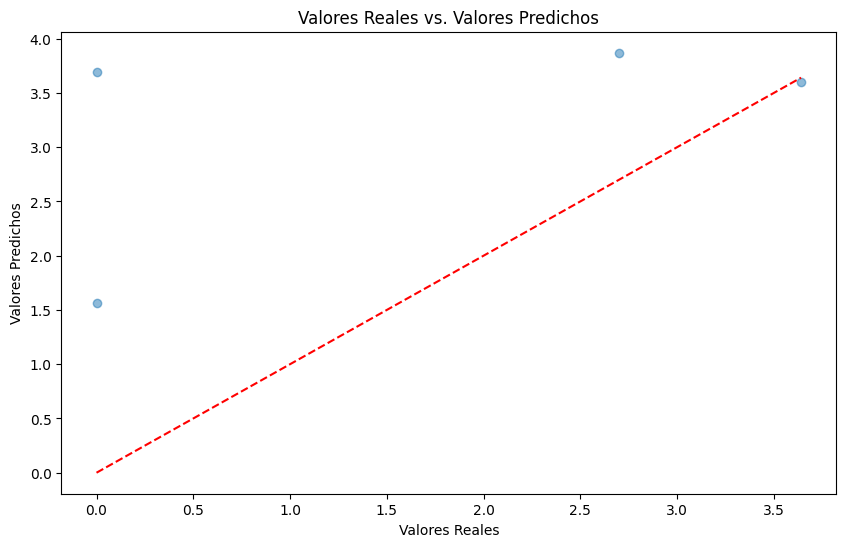

In [269]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_T5, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

**5.  Competencia Kaggle**

In [270]:

import pandas as pd

# Predecir con el modelo entrenado para T5 en los datos de prueba X_test (T1)
y_pred_T1 = model.predict(X_test)

# Obtener 'Number of Cycle' del DataFrame data_test para T1
cycle_numbers_T1 = data_test[data_test['Tnumber'] == 'T1']['number_cycle'].values

# Crear DataFrame de submission
submission_file = pd.DataFrame({
    'ID': cycle_numbers_T1,  # 'Number of Cycle' de la junta 1 (T1)
    'TARGET': y_pred_T1  # Predicciones de longitud de grieta para T1
})

# Mostrar las primeras filas del DataFrame de submission para verificar
print(submission_file.head())

# Guardar el DataFrame de submission en un archivo CSV
submission_file.to_csv('submission_file.csv', index=False)


      ID    TARGET
0  50000  4.723989
1  60000  4.717667
2  62500  0.885689
3  65500  4.917148
4  69025  5.123542
